# 07. 다층 퍼셉트론으로 손글씨 분류하기
이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다.

- MNIST 데이터랑 다른 데이터입니다.

## 1. 숫자 필기 데이터 소개

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1797개의 이미지 데이터 로드

첫번째 샘플을 출력해보겠습니다. .images[인덱스]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있습니다.



In [11]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


첫번째 샘플이 8 × 8 행렬로 출력된 것을 볼 수 있습니다. 0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보입니다. 실제로 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인해봅시다.



In [12]:
print(digits.target[0])

0


첫번째 샘플의 레이블은 0인 것을 확인할 수 있습니다. 이런 샘플이 몇 개 있는지 확인해봅시다.



In [13]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


전체 샘플의 개수는 1,797개입니다. 전체 샘플 중에서 상위 5개의 샘플만 시각화해봅시다.



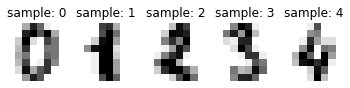

In [36]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % index)

상위 5개의 샘플을 시각화해봤는데, 순서대로 숫자 0, 1, 2, 3, 4의 손글씨인 것처럼 보입니다.
상위 5개 샘플의 레이블을 확인해보겠습니다.



In [23]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


이제 훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다. 더 나은 방법은 digts.data를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [25]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


8 × 8 행렬이 아니라 64차원의 벡터로 저장된 것을 볼 수 있습니다. 이를 X로 저장하고, 레이블을 Y에 저장합니다.



In [27]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

***
## 2. 다층 퍼셉트론 분류기 만들기


In [37]:
import torch
import torch.nn as nn
from torch import optim

In [47]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [48]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [49]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [50]:
optimizer = optim.Adam(model.parameters())

In [51]:
losses = []

In [52]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item())

Epoch    0/100 Cost: 2.440531
Epoch   10/100 Cost: 2.034033
Epoch   20/100 Cost: 1.745394
Epoch   30/100 Cost: 1.467416
Epoch   40/100 Cost: 1.199436
Epoch   50/100 Cost: 0.922142
Epoch   60/100 Cost: 0.668644
Epoch   70/100 Cost: 0.475449
Epoch   80/100 Cost: 0.341614
Epoch   90/100 Cost: 0.256559


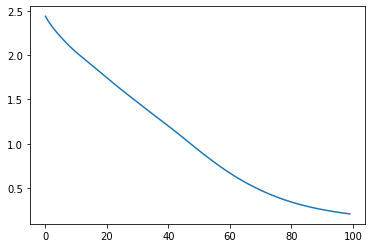

In [53]:
plt.plot(losses)